# Coupled excitable FHN units 

Extreme events have been reported in coupled FitzHugh-Nagumo (FHN) systems ([Ansmann 2013], [Karnatak 2014], [Saha 2017]). However, in these studies, the FHN systems have been in the relaxation oscillation regime. In this study we aim to explore the effects of the extreme events on FHN systems in the excitable regime.

> #### The FitzHugh Nagumo Model
>
> It is a two-dimensional model given as
>
> $$ \frac{dx}{dt} = f(x) - y $$
> $$ \frac{dy}{dt} = \alpha x - \beta y $$
>
> where $f(x)$ is a cubic function

[Ansmann 2013]: https://journals.aps.org/pre/abstract/10.1103/PhysRevE.88.052911
[Karnatak 2014]: https://journals.aps.org/pre/abstract/10.1103/PhysRevE.90.022917
[Saha 2017]: https://journals.aps.org/pre/abstract/10.1103/PhysRevE.95.062219

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.integrate as sci
from tqdm import tqdm

In [2]:
def network_ode(z, t, N, A, s, k=0.02, ϵ1=1000, ϵ2=0.05, c=1.5, a=0.35):
    
    zz = list(np.zeros(2*N))
    
    for i in range(N):
        
        KK = sum(A[i,j]*k*(z[2*j]-z[2*i]) for j in range(N))/2
        
        if i==0:
            KK += s
        
        zz[2*i] = (z[2*i] - (z[2*i]**3)/3 - c*z[2*i+1] - a + KK)/(ϵ1*ϵ2)
        zz[2*i+1] = (z[2*i] - c*z[2*i+1])/(ϵ1)
    
    return zz

In [3]:
def create_adjacency_adjacency(N):
    A = np.zeros((N,N))
    for i in range(N):
        A[i,(i-1)%N] = 1
        A[i,(i+1)%N] = 1
    return A

In [4]:
def ode_solver(func, tf, dt, z_init, signal, N, A, K):
    
    times = np.arange(0, tf, dt)
    data = np.zeros((int(tf/dt), len(z_init)))
    
    z = z_init
    
    index = 0
    
    for time in times:
        sol = sci.odeint(func, z, [time, time+dt], args=(N, A, signal[index], K))
        z = list(sol[-1])
        data[index] = z
        index+=1
    
    return data

In [5]:
def find_maximas(dd, threshold=-float('inf'), para=0, osc=0):
    mx = np.array([np.array([para, osc, i, dd[i]]) for i in range(1,len(dd)-1) if dd[i]>max(dd[i-1],dd[i+1])])
    mx = mx[mx[:,3]>threshold]
    return mx

In [21]:
seed = 1234

np.random.seed(seed)

tf = 100000
dt = 1
N = 2
pert_freq = 10000

ss = np.zeros(int(tf/dt))

for i in range(int(tf/dt)):
    if i>0 and i%pert_freq==0:
        ss[i] = 10

adj = create_adjacency_adjacency(N)

z0 = np.random.random(2*N)

d = ode_solver(network_ode, tf, dt, z0, ss, N, adj, 0.0)

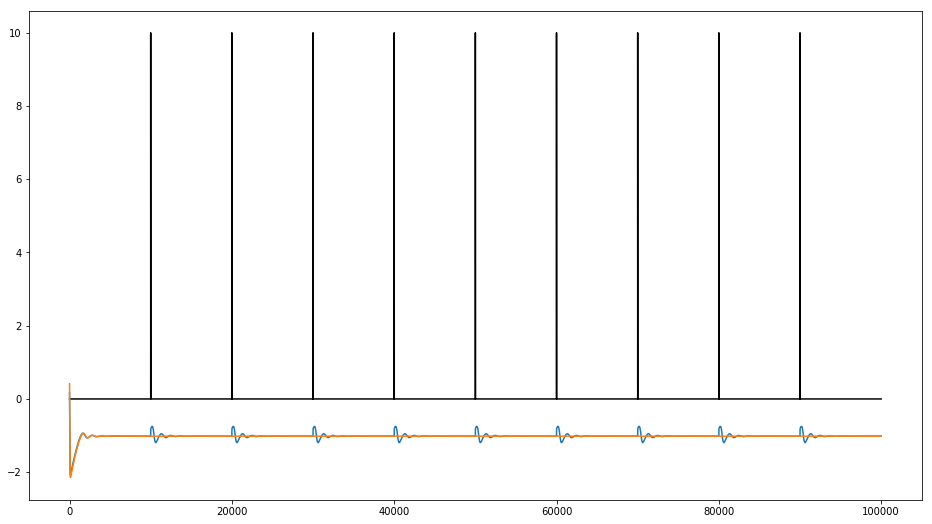

In [22]:
plt.figure(figsize=(16,9))

plt.plot(ss,'k')
for i in range(N):
    plt.plot(d[:,2*i])
plt.show()

In [24]:
bif_data = np.empty((0,4))

for bif_para in tqdm(np.arange(10000,10001,100)):
    
    seed = 1234
    np.random.seed(seed)

    tf = 100000
    dt = 1
    N = 2
    pert_freq = bif_para
    transience = 1000

    ss = np.zeros(int(tf/dt))
    for i in range(int(tf/dt)):
        if i>0 and i%pert_freq==0:
            ss[i] = 10

    adj = create_adjacency_adjacency(N)
    z0 = np.random.random(2*N)
    d = ode_solver(network_ode, tf, dt, z0, ss, N, adj, 0.0)
    
    for i in range(N):
        d = d[transience:]
        current_data = find_maximas(d[:,2*i], threshold=-2, para=bif_para, osc=i)
        if np.shape(current_data) == (0,4):
            pass
        else:
            bif_data = np.append(bif_data,current_data,axis=0)




  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:32<00:00, 32.70s/it]




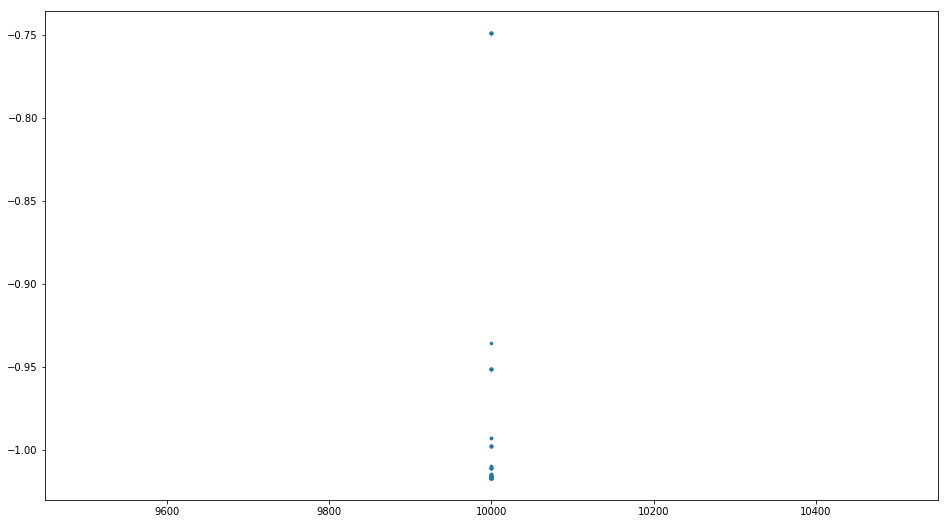

In [25]:
plt.figure(figsize=(16,9))
plt.plot(bif_data[:,0], bif_data[:,3], '.', ms=5)
plt.show()

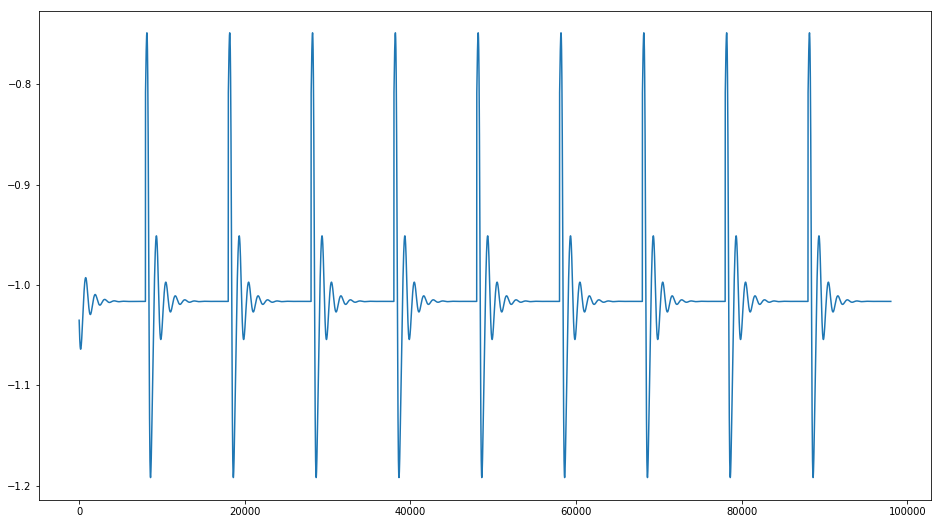

In [27]:
plt.figure(figsize=(16,9))
plt.plot(d[:,0])
# plt.plot(ss)
plt.show()